In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading in data

In [3]:
mitbih_train_df = pd.read_csv("../data/mitbih/mitbih_train.csv", header=None)
mitbih_test_df = pd.read_csv("../data/mitbih/mitbih_test.csv", header=None)

In [4]:
mitbih_train_df.head()

0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

In [5]:
mitbih_train_df.shape

(87554, 188)

In [6]:
mitbih_test_df.head()

0         1         2         3         4         5         6    \
0  1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1  0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2  0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3  1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4  0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

In [7]:
mitbih_test_df.shape

(21892, 188)

## Looking at data distribution

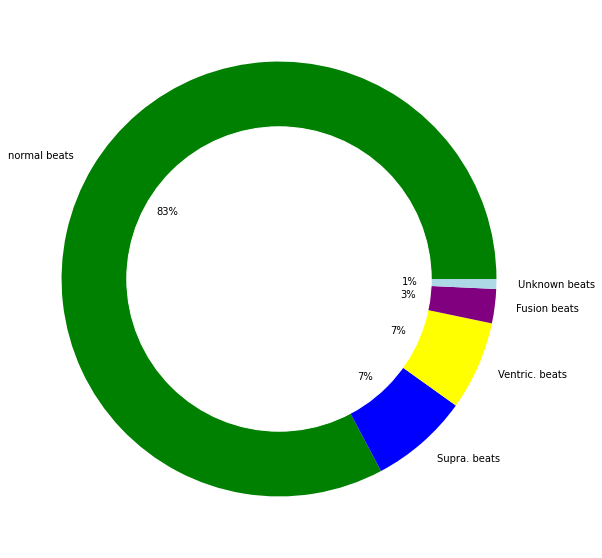

In [8]:
mitbih_train_df[187] = mitbih_train_df[187].astype(int)
count = mitbih_train_df[187].value_counts()
labels = ["normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"]

plt.figure(figsize=(10, 10))
pie = plt.Circle((0, 0), 0.7, color="white")
plt.pie(count, labels=["normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"], colors=["green", "blue", "yellow", "purple", "lightblue"], autopct='%1.0f%%')
p = plt.gcf()
p.gca().add_artist(pie)
plt.show()

## Looking at the ECG-signals for the different classes

In [10]:
samples = mitbih_train_df.groupby(187, group_keys=False).apply(lambda mitbih_train_df: mitbih_train_df.sample(1))
samples

0         1         2         3         4         5         6    \
57750  1.000000  0.673511  0.082136  0.024641  0.096509  0.082136  0.069815   
74274  1.000000  0.968563  0.432635  0.073353  0.314371  0.369760  0.362275   
75110  0.979206  0.920605  0.822306  0.718336  0.661626  0.601134  0.603025   
80676  1.000000  0.893281  0.632411  0.363636  0.249012  0.158103  0.118577   
84895  1.000000  0.425926  0.422222  0.403704  0.448148  0.444444  0.488889   

            7         8         9    ...  178  179  180  181  182  183  184  \
57750  0.057495  0.039014  0.043121  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
74274  0.389222  0.389222  0.375749  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
75110  0.527410  0.396975  0.241966  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
80676  0.071146  0.079051  0.031621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
84895  0.477778  0.459259  0.344444  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       185  186  187  
57750  0.0  0.0    0  
74274  0.0  0.0    1  
75110  0.0  0.0    2  
80676  0.0  0.0    3  
84895  0.0  0.0    4  

[5 rows x 188 columns]

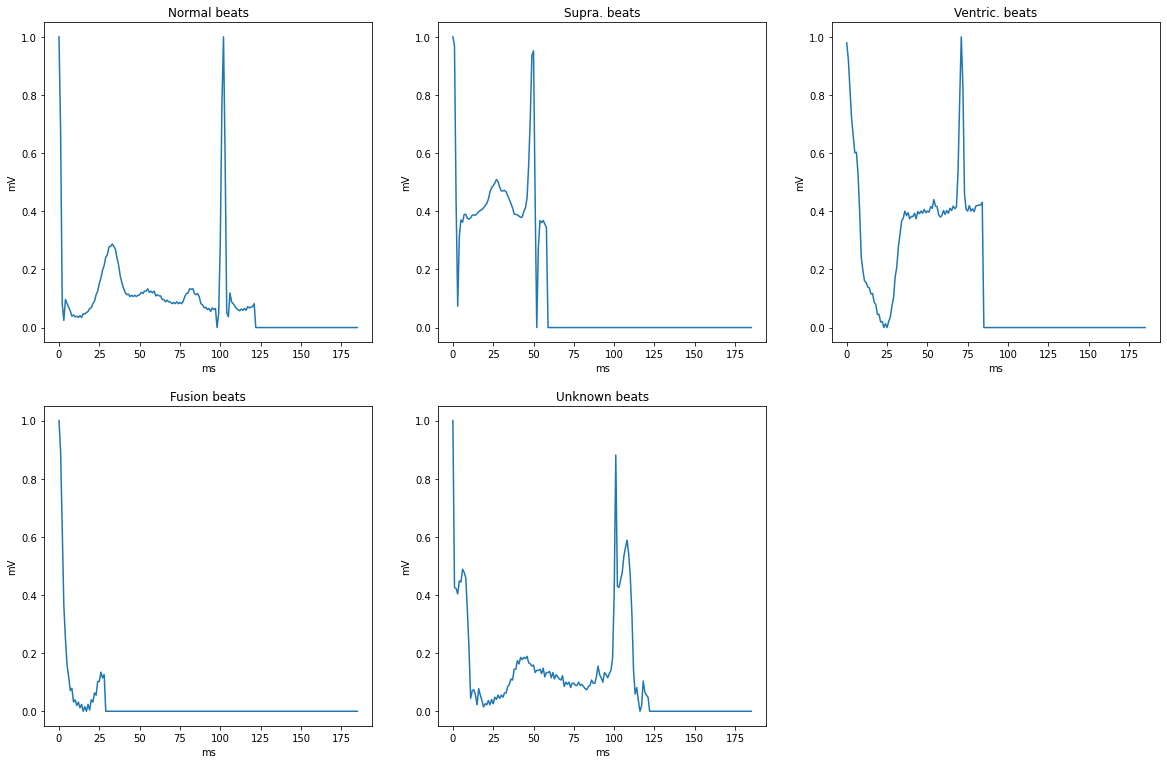

In [11]:
plt.figure(figsize=(20, 20))
for i, name in enumerate(["Normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"]):
    plt.subplot(3,3,i+1)
    plt.xlabel("ms")
    plt.ylabel("mV")
    plt.plot(samples.iloc[i,:186])
    plt.title(name)

plt.savefig("graphs_ecg_2.png", dpi=960)

## Time series heatmap for the different classes

In [11]:
def heatmap(df, class_label, min_val, size, title):
    img = df.loc[mitbih_train_df[187]==class_label].values
    img = img[:, min_val:size]
    img_flatten = img.flatten()

    final = np.arange(min_val, size)
    for _ in range(img.shape[0]-1):
        tempo = np.arange(min_val, size)
        final = np.concatenate((final, tempo), axis=None)
    plt.hist2d(final, img_flatten, bins=(65, 65), cmap=plt.cm.jet)
    plt.colorbar()
    plt.title('2D Histogram - '+ title)

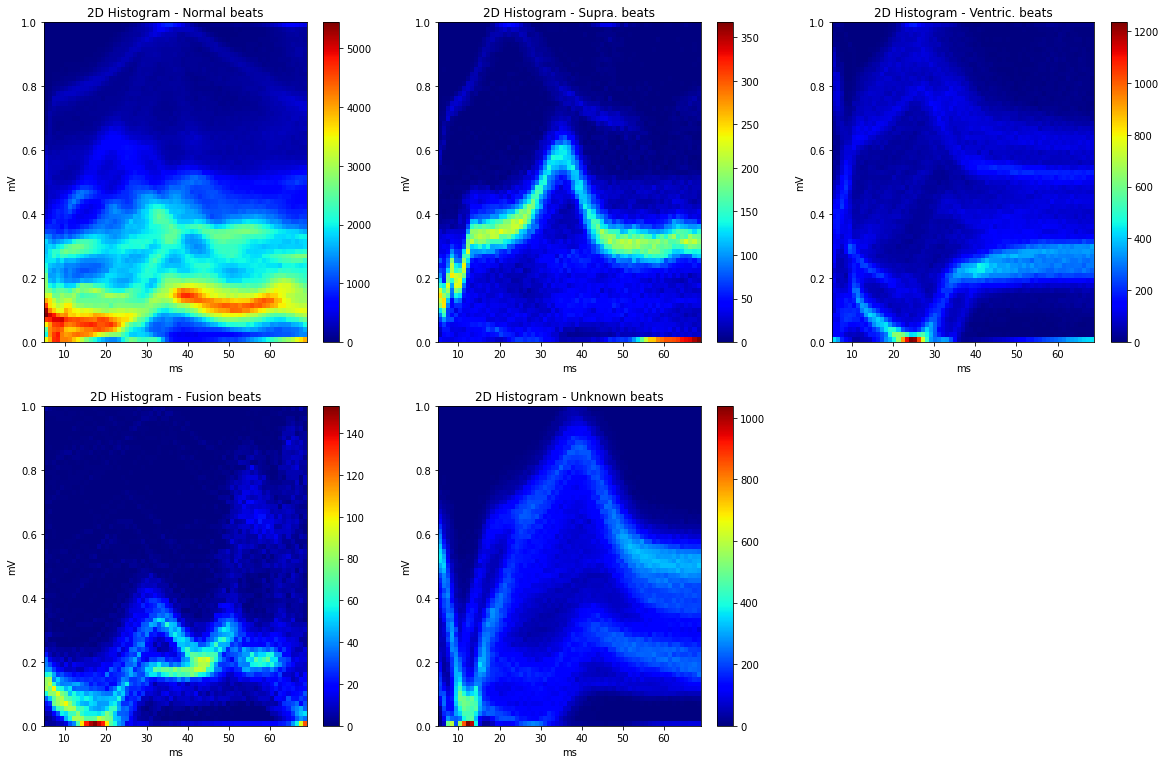

In [13]:
plt.figure(figsize=(20, 20))
for i, name in enumerate(["Normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"]):
    plt.subplot(3,3,i+1)
    plt.xlabel("ms")
    plt.ylabel("mV")
    heatmap(mitbih_train_df, i, 5, 70, name)
plt.show()

In [15]:
from sklearn.utils import resample
df_1=mitbih_train_df[mitbih_train_df[187]==1]
df_2=mitbih_train_df[mitbih_train_df[187]==2]
df_3=mitbih_train_df[mitbih_train_df[187]==3]
df_4=mitbih_train_df[mitbih_train_df[187]==4]
df_0=(mitbih_train_df[mitbih_train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

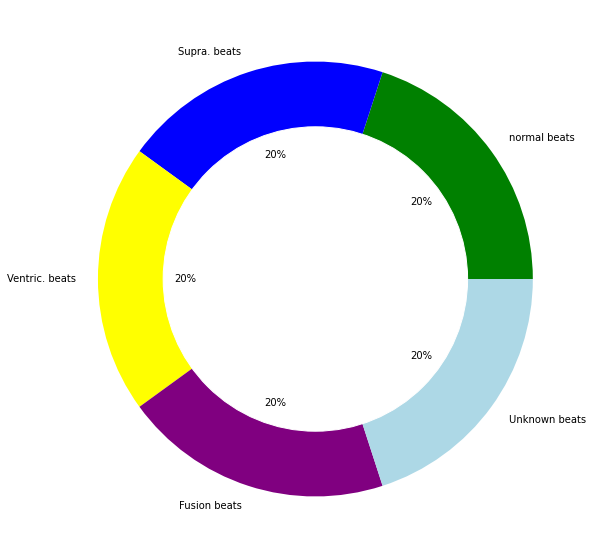

In [18]:
train_df[187] = train_df[187].astype(int)
count = train_df[187].value_counts()
labels = ["normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"]

plt.figure(figsize=(10, 10))
pie = plt.Circle((0, 0), 0.7, color="white")
plt.pie(count, labels=["normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"], colors=["green", "blue", "yellow", "purple", "lightblue"], autopct='%1.0f%%')
p = plt.gcf()
p.gca().add_artist(pie)
plt.show()